In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from numpy import pi, e
import seaborn as sns

# COMPORTAMENTO DOS DADOS
A variável desejada nesse esperimento é o período de um pêndulo simples, antes de saber quais as grandezas que alteram no período desse pêndulo, primeiro precisamos saber como essa variável se distribui em torno de uma média central

- Obtendo e processando 140 dados que são os períodos registrados em um pêndulo simples mantendo as suas variáveis (massa, comprimento e amplitude) constantes para observar a distribuição desses dados ao redor de uma média central

In [2]:
stringDados = r"""
    19,68 19,44 19,54 19,63 19,63 19,6 19,64 19,57 19,54 19,62 19,57 19,51 19,39 19,55 19,91 19,76 19,46
    19,72 19,76 19,79 19,55 19,62 19,85 19,69 19,69 19,73 19,65 19,66 19,7 19,64 19,76 19,65 19,65 19,66
    19,82 19,66 19,61 19,74 19,69 19,89 19,86 19,73 20,03 19,95 19,89 19,74 19,8 19,81 19,88 19,79 19,5
    19,7 19,81 19,64 19,72 19,75 19,65 19,69 19,62 19,52 19,68 19,6 19,84 19,49 19,68 19,74 19,54 19,76
    19,6 19,8 19,54 19,59 19,78 19,7 19,68 19,9 20,11 19,77 19,64 19,56 19,52 19,58 19,69 19,45 19,94 19,68
    19,45 19,63 19,6 19,7 19,62 19,58 19,7 19,78 19,78 19,72 19,56 19,65 19,64 19,23 19,56 19,73 19,58 19,78
    19,64 19,58 19,6 19,59 19,67 19,67 19,52 19,53 19,56 19,64 19,66 19,61 19,72 19,47 19,65 19,71 19,66 19,68
    19,77 19,72 19,38 19,55 19,65 19,73 19,64 19,72 19,6 19,67 19,5 19,84 19,56 19,76 19,56 19,71 19,77 19,76 
"""

In [3]:
def formatarDados(string=''):
    string = string.strip().replace('\n', ' ').replace(',', '.')
    string = ' '.join(string.split()) # SUBSTITUINDO OS ESPAÇOS POR APENAS 1
    string = string.split(' ')
    lista = []
    for c in range(0, len(string)):
        lista.append(float(string[c]))
    return lista

In [4]:
dados = formatarDados(stringDados)
print(dados)

[19.68, 19.44, 19.54, 19.63, 19.63, 19.6, 19.64, 19.57, 19.54, 19.62, 19.57, 19.51, 19.39, 19.55, 19.91, 19.76, 19.46, 19.72, 19.76, 19.79, 19.55, 19.62, 19.85, 19.69, 19.69, 19.73, 19.65, 19.66, 19.7, 19.64, 19.76, 19.65, 19.65, 19.66, 19.82, 19.66, 19.61, 19.74, 19.69, 19.89, 19.86, 19.73, 20.03, 19.95, 19.89, 19.74, 19.8, 19.81, 19.88, 19.79, 19.5, 19.7, 19.81, 19.64, 19.72, 19.75, 19.65, 19.69, 19.62, 19.52, 19.68, 19.6, 19.84, 19.49, 19.68, 19.74, 19.54, 19.76, 19.6, 19.8, 19.54, 19.59, 19.78, 19.7, 19.68, 19.9, 20.11, 19.77, 19.64, 19.56, 19.52, 19.58, 19.69, 19.45, 19.94, 19.68, 19.45, 19.63, 19.6, 19.7, 19.62, 19.58, 19.7, 19.78, 19.78, 19.72, 19.56, 19.65, 19.64, 19.23, 19.56, 19.73, 19.58, 19.78, 19.64, 19.58, 19.6, 19.59, 19.67, 19.67, 19.52, 19.53, 19.56, 19.64, 19.66, 19.61, 19.72, 19.47, 19.65, 19.71, 19.66, 19.68, 19.77, 19.72, 19.38, 19.55, 19.65, 19.73, 19.64, 19.72, 19.6, 19.67, 19.5, 19.84, 19.56, 19.76, 19.56, 19.71, 19.77, 19.76]


# HISTOGRAMA DOS DADOS
Vamos criar um gráfico de histograma para confirmar se a distribuição dos dados é normal (gaussiana), onde os valores se concentram em torno da média (maior probabilidade) e poderemos usar o desvio padrão amostral e incerteza da média

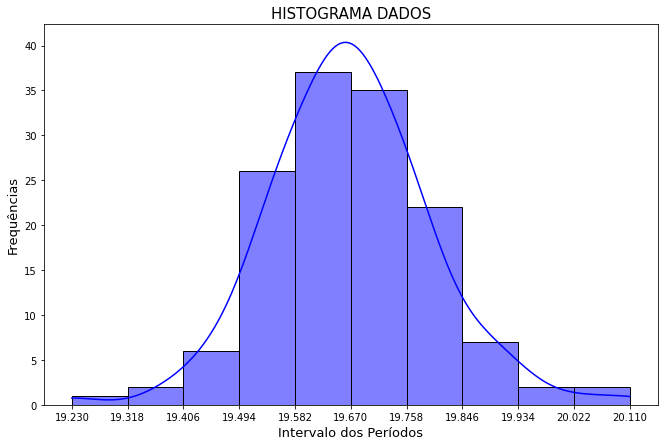

In [5]:
caixas = 10
frequencia = np.linspace(min(dados), max(dados), caixas+1)

plt.figure(figsize=(11,7))
sns.histplot(dados, color='blue', kde=True, bins=caixas)
plt.xticks(frequencia)

plt.title('HISTOGRAMA DADOS', fontsize=15)
plt.xlabel('Intervalo dos Períodos', fontsize=13)
plt.ylabel('Frequências', fontsize=13)
plt.show()

Vemos que a distribuição dos dados é aproximadamente normal (em comparação com a gaussiana) pelo gráfico acima, o que significa que podemos usar métodos de desvio padrão pois os valores se concentram ao redor da média

# DISTRIBUIÇÃO NORMAL
- Definindo as funções para distribuição normal e a probabilidade de ocorrência de um valor entre $a$ e $b$

$G(x) = \frac{1}{\sigma \sqrt{2\pi} }\,e^{-\frac{(x - \mu)^2}{2\sigma^2}}\,\,\,\,\,\, e \,\,\,\,\,\,\,\,P(a \leq x \leq b) = \int^b_a \frac{1}{\sigma\sqrt{2\pi}}\,e^{-\frac{(x - \mu)^2}{2\sigma^2}}\,dx$

In [6]:
# G(X) => DISTRIBUIÇÃO GAUSSIANA
def gaussian(x, mean, std):
    return (1 / (std * np.sqrt(2*np.pi)) ) * np.exp(-0.5 * ((x-mean)/std)**2)

# P(X) => CALCULADO POR INTEGRAÇÃO
def gaussianProb(data, a, b, n=100000):
    data = np.array(data)
    mean = np.mean(data)
    std  = np.std(data)
    
    x  = np.linspace(a, b, n)
    dx = x[1] - x[0]

    y = gaussian(x, mean, std)
    return np.sum(y) * dx

# MAIOR PROBABILIDADE ENCONTRADA (OCORRE NA MÉDIA)
def yMax(desvio):
    return 1 / (desvio * (2*np.pi)**0.5)

In [7]:
G = gaussian(19.6, np.mean(dados), np.std(dados))
print(f'A probabilidade de obtermos um período de exatamente 19.6 segundos é de: {G:.2f} %')

A = gaussianProb(dados, 18, 20) * 100 # PORCENTAGEM
print(f'A probabilidade de obtermos um período entre 18 e 20 é: {A:.2f} %')

probMaxima = yMax(np.std(dados))
print(f'A maior probabilidade da média (maior chance de ocorrer) é: {probMaxima:.2f} % \n')

A probabilidade de obtermos um período de exatamente 19.6 segundos é de: 2.72 %
A probabilidade de obtermos um período entre 18 e 20 é: 99.55 %
A maior probabilidade da média (maior chance de ocorrer) é: 3.14 % 



- Criando uma função que retorna duas listas com os eixos x e y dos valores da distribuição gaussiana entre $a$ e $b$

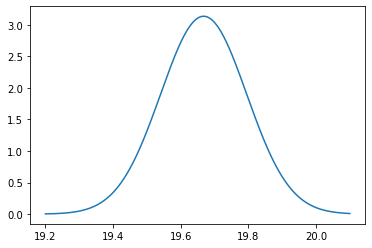

In [8]:
def graficoProbabilidade(a, b, media, desvio, n=10000):
    xDados = np.linspace(a, b, n)
    yDados = gaussian(xDados, media, desvio)

    plt.plot(xDados, yDados)
    plt.show()

graficoProbabilidade(19.2, 20.1, np.mean(dados), np.std(dados))

# INCERTEZA DA MÉDIA
- Gerando uma lista de dados aleatórios e únicos presente nos dados para maior precisão da incerteza da média

In [9]:
def dadosAleatorios(dados, qtdMax=2, percentage=False, maxIterations=100000):
    dados = np.array(dados)
    n = dados.size
    i = 0

    if percentage:
        qtdMax = int(percentage/100 * n)

    randomPositions = np.zeros(qtdMax, dtype=np.int64)
    
    while True:
        position = random.randint(0, n-1)

        if position not in randomPositions:
            randomPositions[i] = position
            i += 1

        if i == qtdMax or i > maxIterations:
            break  
    
    return dados[randomPositions]

- Usando a tabela T-Student para encontrar a incerteza da média de um conjunto de valores distibuídos normalmente (suas frequências se concentram em torno da média) com 95% de precisão (intervalo onde 95% dos dados estão)

In [10]:
def incertezaMedia(lista):
    n = len(lista) - 1 # ÚLTIMA POSIÇÃO 
    tabelaStudent = [
        0, 12.706, 4.303, 3.182, 2.776, 2.571, 2.447, 2.265, 2.306, 2.262, 2.228, 2.201, 2.179,
        2.160, 2.145, 2.131, 2.120, 2.110, 2.101, 2.093, 2.086, 2.080, 2.074, 2.069, 2.064,
        2.060, 2.056, 2.052, 2.048, 2.045, 2.042
    ]
    
    correcao = tabelaStudent[n] if n <= 30 else 1.96
    return correcao * np.std(lista)/(n**0.5) 

- Podemos ver no código abaixo que a média e a incerteza da média não variam tanto e está ao redor de um valor único de 19.6 segundos

In [11]:
for n in range(5, 140, 20):
    amostra = dadosAleatorios(dados, n)
    print(f'A MÉDIA DE {n} VALORES ALEATÓRIOS DA LISTA É: {np.mean(amostra):.2f} += {incertezaMedia(amostra):.2f}')

A MÉDIA DE 5 VALORES ALEATÓRIOS DA LISTA É: 19.68 += 0.21
A MÉDIA DE 25 VALORES ALEATÓRIOS DA LISTA É: 19.65 += 0.05
A MÉDIA DE 45 VALORES ALEATÓRIOS DA LISTA É: 19.66 += 0.04
A MÉDIA DE 65 VALORES ALEATÓRIOS DA LISTA É: 19.68 += 0.03
A MÉDIA DE 85 VALORES ALEATÓRIOS DA LISTA É: 19.66 += 0.03
A MÉDIA DE 105 VALORES ALEATÓRIOS DA LISTA É: 19.66 += 0.02
A MÉDIA DE 125 VALORES ALEATÓRIOS DA LISTA É: 19.67 += 0.02


Então com 105 dos valores já podemos chegar à conclusão de que que 95% dos valores se encontram no intervalo $19.67 \pm 0.02$ segundos

# GRÁFICO LINEAR DA MÉDIA DOS PERÍODOS
O objetivo deste trabalho é realizar o experimento do pêndulo simples e captar os dados
do período em cada um, para assim determinar quais são os fatores que determinam o
que alteram o período de um pêndulo simples.

Para diminuir o erro no período do pêndulo, devemos fazer com que no mesmo experimento, haja uma captação de dados contínua, ou seja, soltar o pêndulo uma só vez
e deixar ele realizar 3 oscilações seguidas, para assim dividir esse tempo por 3, dessa
forma, o erro fica distribuído entre as medidas e o delay de reação do ser humano é dimi
nuído. Quanto maior for essa divisão, menor o erro no período. Para diminuir ainda mais
esse erro de reação, a cronometragem do tempo será feita através de um aplicativo de
forma muito mais precisa e eficiente.

Em cada mudança de variável para calcular o período de oscilação, serão efetuados 5
experimentos, T (1º), T (2º), T (3º), T (4º) e T (5º), para assim tirar uma média dos três T
(média) que será exibida nas tabelas. Escolhemos realizar 5 experimentos pois na tabela
de 140 dados do pêndulo fica clara que a diferença entre 5 e 50 dados é praticamente
desprezível na incerteza da média.

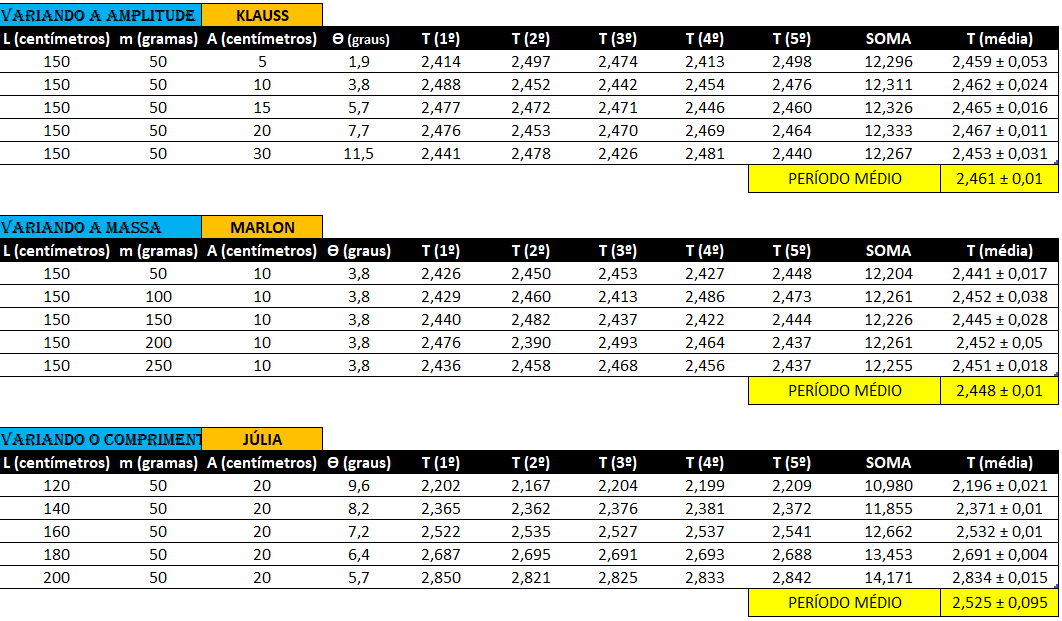

- Criando um gráfico usando 3 listas de 5 valores que são a média dos períodos de cada variação (massa, comprimento e amplitude). Com isso será possível visualizar como essas 3 variáveis variam o período do pêndulo

In [12]:
MASSA       = [2.459, 2.462, 2.465, 2.467, 2.453]
AMPLITUDE   = [2.441, 2.452, 2.445, 2.452, 2.451]
COMPRIMENTO = [2.196, 2.371, 2.532, 2.691, 2.834]

x = [c for c in range(1, len(MASSA) + 1)]

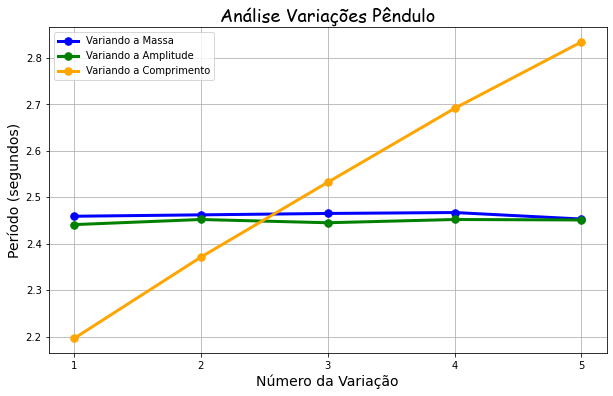

In [13]:
plt.figure(figsize=(10, 6))

# PLOTANDO O PERÍODO T(m)
plt.plot(x, MASSA, label='Variando a Massa', linewidth=3, color='blue', marker='.', markersize=15)

# PLOTANDO O PERÍODO T(A)
plt.plot(x, AMPLITUDE, label='Variando a Amplitude', linewidth=3, color='green', marker='.', markersize=15)

# PLOTANDO O PERÍODO T(c)
plt.plot(x, COMPRIMENTO, label='Variando a Comprimento', linewidth=3, color='orange', marker='.', markersize=15)

plt.title('Análise Variações Pêndulo', fontsize=18, fontname='Comic Sans MS')
plt.xlabel('Número da Variação', fontsize=14)
plt.ylabel('Período (segundos)', fontsize=14)

plt.xticks([c for c in range(1, len(MASSA) + 1)])
plt.legend(loc="upper left")
plt.grid()

plt.show()

# ANÁLISE MATEMÁTICA
A melhor forma de analisar se os dados variam é por meio da INCERTEZA RELATIVA, que será a incerteza da média dividido pela própria média

In [14]:
variacaoMassa       = incertezaMedia(MASSA)/np.mean(MASSA) * 100
variacaoComprimento = incertezaMedia(COMPRIMENTO)/np.mean(MASSA) * 100
variacaoAmplitude   = incertezaMedia(AMPLITUDE)/np.mean(MASSA) * 100

print(f'A VARIAÇÃO DA MASSA É DE {variacaoMassa:.3f}%')
print(f'A VARIAÇÃO DO COMPRIMENTO É DE {variacaoComprimento:.3f}%')
print(f'A VARIAÇÃO DA AMPLITUDE É DE {variacaoAmplitude:.3f}%')

A VARIAÇÃO DA MASSA É DE 0.277%
A VARIAÇÃO DO COMPRIMENTO É DE 12.737%
A VARIAÇÃO DA AMPLITUDE É DE 0.251%


A razão (divide os 3 pelo menor) mostra claramente qual é a variável discrepante. Como a variação do comprimento é 50 vezes maior que a do resto, conclui-se que ela varia no período do pêndulo.

In [15]:
RAZAO = (variacaoMassa/variacaoAmplitude, variacaoComprimento/variacaoAmplitude, variacaoAmplitude/variacaoAmplitude)
RAZAO

(1.105745027019029, 50.80752757514887, 1.0)

# TABELA ANOVA
Utilizando a tabela ANOVA e seus métodos matemáticos, poderemos comprovar qual é a variável que realmente gera uma variação no período do pêndulo

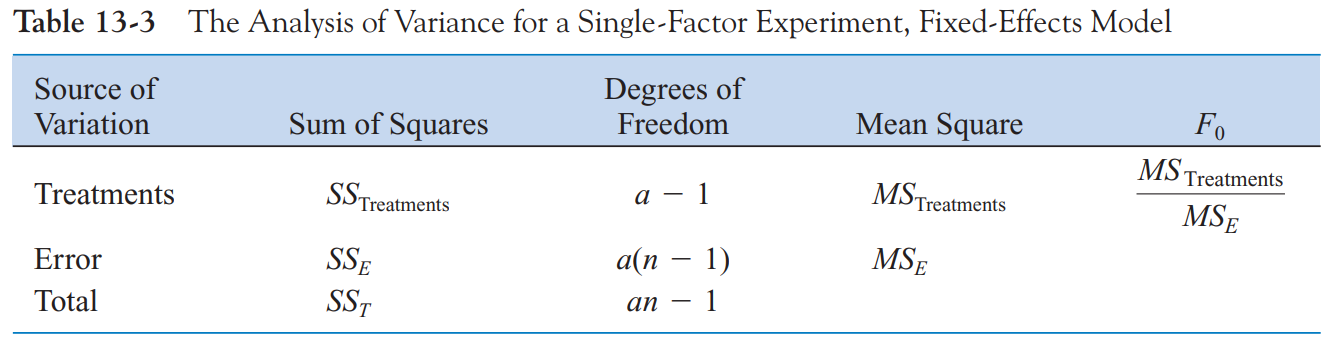

In [16]:
AMPLITUDE = [
    [2.414, 2.497, 2.474, 2.413, 2.498],
    [2.488, 2.452, 2.442, 2.454, 2.476],
    [2.477, 2.472, 2.471, 2.446, 2.460],
    [2.476, 2.453, 2.470, 2.469, 2.464],
    [2.441, 2.478, 2.426, 2.481, 2.440]
]

MASSA = [
    [2.426, 2.450, 2.453, 2.427, 2.448],
    [2.429, 2.460, 2.413, 2.486, 2.473],
    [2.440, 2.482, 2.437, 2.422, 2.444],
    [2.476, 2.390, 2.493, 2.464, 2.437],
    [2.436, 2.458, 2.468, 2.456, 2.437]
]

COMPRIMENTO = [
    [2.202, 2.167, 2.204, 2.199, 2.209],
    [2.365, 2.362, 2.376, 2.381, 2.372],
    [2.522, 2.535, 2.527, 2.537, 2.541],
    [2.687, 2.695, 2.691, 2.693, 2.688],
    [2.850, 2.821, 2.825, 2.833, 2.842]
]

In [17]:
def somaQuadrados(matriz):
    soma = 0
    
    if type(matriz[0]) != list:
        for val in matriz:
            soma += val**2
        return soma
    
    for i in range(len(matriz)):
        for j in range(len(matriz[0])):
            soma += matriz[i][j]**2
    
    return soma

def soma(matriz):
    soma = 0
    
    for i in range(len(matriz)):
        for j in range(len(matriz[0])):
            soma += matriz[i][j]
    
    return soma

def somasIndividuais(matriz):
    somaLista = []
    for i in range(len(matriz)):
        soma = sum(matriz[i])
        somaLista.append(soma)
    
    return somaLista   

def encontrarVariacao(matriz):
    a = len(matriz)
    n = len(matriz[0])
    
    TAM = a * n # TODOS OS DADOS
    somaLista = somasIndividuais(matriz)
    
    tratamentos = somaQuadrados(somaLista)/n - soma(matriz)**2/TAM
    total = somaQuadrados(matriz) - soma(matriz)**2/TAM
    
    erro = abs(total-tratamentos)
    
    MStratamentos = tratamentos/(a - 1)
    MStotal = erro/(n*(a-1))
    
    F0 = MStratamentos/MStotal
    return F0

In [18]:
encontrarVariacao(AMPLITUDE)

0.23177890640196952

In [19]:
encontrarVariacao(MASSA)

0.18919077346214197

In [20]:
encontrarVariacao(COMPRIMENTO)

2875.3035552666224

Analisando a tabela ANOVA para os valores limites com uma confiança de 95% de $F_0 = f(0.05, a-1, a(n-1)) = f(0.05, 4, 20) = 2.87$, vemos que os valores de $F0$ para a variação na massa e amplitude são bem menores que 2.87, indicando que eles não geram variação no período final do pêndulo. Em contrapartida, a variação no comprimento gera $F0=2875$ que é muuuuuito maior do que o limite máximo estabelecido 2.87, isso mostra que a variação no comprimento gera uma grande interferência no período do pêndulo